# Hidden Figures

A simulation of Space Capsule Re-entry by Argyris Kriezis and Sparsh Bansal

# What is the range within which the angle of trajectory of a space capsule should lie to enabe it to enter Earth's atmosphere (and not bounce back into space) as well as to bear the heat produced on the heat shield without burning away?

Factors causing the heat energy transfer:

(i) Friction due to the atmostphere - Force of Drag
(ii) Heat lost to the atmosphere

When a large object enters the atmosphere at high speed, the air in front of it gets compressed so much that it becomes extremely hot.

Parameters that affect the heat energy production:

(i) Velocity of the spacecraft (m/s)
(ii) Radius of the nose (m)
(iii) Air Density (kg/m^3)

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
from pandas import read_csv
density_data = read_csv("Model_Data.csv")
density_data.columns = ['Altitude', 'Scale Height', 'Atmospheric_Density']

In [3]:
print(density_data)

   Altitude  Scale Height  Atmospheric_Density
0         0           8.4         1.225000e+00
1       100           5.9         5.250000e-07
2       150          25.5         1.730000e-09
3       200          37.5         2.410000e-10
4       250          44.8         5.970000e-11
5       300          50.3         1.870000e-11
6       350          54.8         6.660000e-12
7       400          58.2         2.620000e-12
8       450          61.3         1.090000e-12
9       500          64.5         4.760000e-13
10      550          68.7         2.140000e-13
11      600          74.8         9.890000e-14
12      650          84.4         4.730000e-14
13      700          99.3         2.360000e-14
14      750         121.0         1.240000e-14
15      800         151.0         6.950000e-15
16      850         188.0         4.220000e-15
17      900         226.0         2.780000e-15
18      950         263.0         1.980000e-15
19    1,000         296.0         1.490000e-15
20    1,250  

In [4]:
m = 8857
r = 1.85
g = 9.8
Cd = 1
Θ = 0.10472

0.10472

In [5]:
def make_system (V, h, ρ, dt):
    
    '''
    m = mass of the capsule during re-entry
    V = Velocity of the spacecraft
    ρ = Fluid density of the atmosphere
    r = radius of the nose
    dt = time step
    KE = Kinetic Energy of the Capsule
    PE = Potential Energy of the Capsule
    ME = Mechanical Energy of the Capsule
    h = Height of the Capsule from the surface of the Earth
    HS = Heat generated on the heat shield
    HA = Heat lost to the atmosphere
    '''
    init = State(KE = 262565765000, PE = 23293574582, ME = 285859339582, HS = 0, HA = 0)
    t_0 = 0
    t_end = 500
    return System(V=V, h=h, ρ=ρ, dt=dt, 
                  init=init, t_0=t_0, t_end = t_end)

In [6]:
system = make_system(V=7700, h=300000, ρ=0.0000000000258, dt=1)

,values
V,7700
h,300000
ρ,2.58e-11
dt,1
init,KE 262565765000 PE 23293574582 ME 28...
t_0,0
t_end,500


In [7]:
import math

In [8]:
def update_func(state, t, system):
    
    KE, PE, ME, HS, HA = state
    
    dt = 1
    
    dHSdt = (1.83 * (10 ** (-4)) * (system.V ** 3) * ((system.ρ/r) ** 0.5))
    dVdt = (m * g * math.sin(Θ) - (0.5 * system.ρ * (system.V ** 2) * 3.14 * (r ** 2) * Cd))/m
    dKEdt = 0.5 * m * (dVdt ** 2) 
    dhdt = system.V * math.sin(Θ) * dt
        
    if h > 300000:
        system.ρ = 1.870000e-11
    if 300000 > h > 250000:
        system.ρ = 5.970000e-11
    if 250000 > h > 200000:
        system.ρ = 2.410000e-10
    if 200000 > h > 150000:
        system.ρ = 1.730000e-09
    if 150000 > h > 100000:
        system.ρ = 5.250000e-07
    if 100000 > h > 0:
        system.ρ = 1.225000e+00
        
    dh = dhdt*dt
    dHS = dHSdt*dt
    dPE = (m * g * dhdt * dt)
    dKE = dKEdt*dt
    dV = dVdt*dt
        
    system.V = system.V - dV
    system.h = system.h - dh
    HS = HS + dHS
    ME = ME - dKE - dPE
    PE = PE - dPE
    KE = KE - dKE
    HA = ME - HS
    
    return State(KE=KE, PE=PE, ME=ME, HS=HS, HA=HA)

In [9]:
def run_simulation(system, update_func):
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    
    for t in linrange(t_0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
        
    return frame

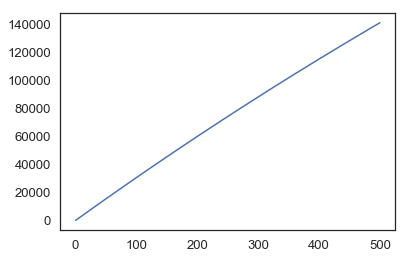

In [10]:
updated_factors = run_simulation(system, update_func)
updated_factors.HS.plot()

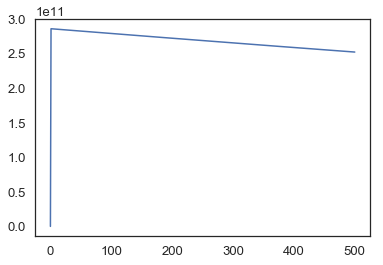

In [11]:
updated_factors.HA.plot()

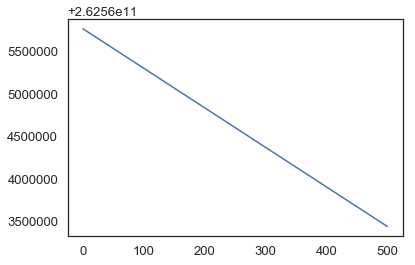

In [12]:
updated_factors.KE.plot()

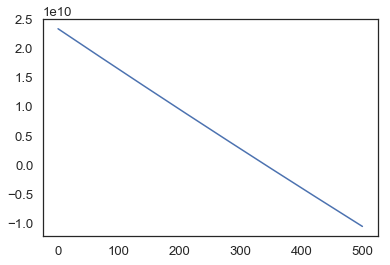

In [13]:
updated_factors.PE.plot()

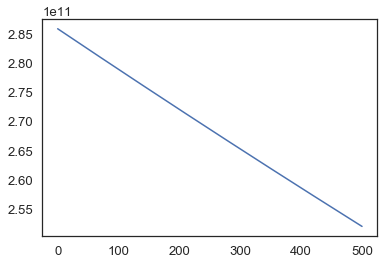

In [14]:
updated_factors.ME.plot()